## Groupby and Aggregation (Split-Apply-Combine):

This notebook will provide a walkthrough for data **splitting** (mapping) with ```groupby()```, **apply** some action (e.g.,```count(), sum(), mean(), std()```) and finally **combine** through ```aggregation(), transform()``` action (reduction). 

Read more about these functionality from [Pydata documentation for Group by (split-apply-combine)](https://pandas.pydata.org/docs/user_guide/groupby.html)[1].
Some parts of this notebook are taken from [EuroScipy 2016 Pandas Tutorial by Joris Van den Bossche and Nicholas Devenish](https://github.com/jorisvandenbossche/pandas-tutorial)[2]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#### Load data

In [6]:
titanic = pd.read_csv('data/titanic.csv')
titanic = titanic.set_index('Name')
titanic.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


#### The groupby operation (split-apply-combine)
is followed by multiple functionality e.g., ```groupby.aggregate()```,```groupby.count()``` ```groupby.size()```,```groupby.mean()```. 

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="plots/splitApplyCombine.png">


#### 1. Simple Groupby and aggregate example:
Lets create a sample dataframe to operate ```groupby()``` followed by ```size()``` and ```aggregate()``` with ```np.sum()``` seperately.

In [49]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df.head(2)

,key,data
0,A,0
1,B,5


The ```groupby()``` operation followed by ```size()``` does not return a ```DataFrame``` object, it becomes a pandas ```Series``` object.

In [61]:
result = df.groupby('key').size()
print("Object type:", type(result))
print(result)

Object type: <class 'pandas.core.series.Series'>
key
A    3
B    3
C    3
dtype: int64


The ```groupby()``` operation followed by ```aggregate()``` returns a ```DataFrame``` object.

In [60]:
result = df.groupby('key').aggregate(np.sum)
print("object type:", type(result))
result

object type: <class 'pandas.core.frame.DataFrame'>


,data
key,
A,15
B,30
C,45


#### 2. Exercise with Titanic Dataset

<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), calculate the total number for each sex catagory.
</div>

In [52]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), calculate the average age for each sex.
</div>

In [19]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the average survival ratio for all passengers.
</div>

In [21]:
titanic['Survived'].sum() / len(titanic['Survived'])

0.3838383838383838

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).
</div>

In [22]:
df25 = titanic[titanic_df1['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

<div class="alert alert-success">
    <b>EXERCISE</b>: Is there a difference in this survival ratio between the sexes? (tip: write the above calculation of the survival ratio as a function)
</div>

In [24]:
def survival_ratio(survived):
    return survived.sum() / len(survived)

In [25]:
titanic.groupby('Sex')['Survived'].aggregate(survival_ratio)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Make a bar plot of the survival ratio for the different classes ('Pclass' column).
</div>

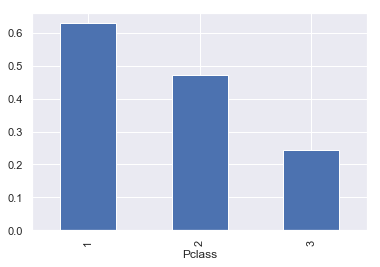

In [47]:
titanic.groupby('Pclass')['Survived'].aggregate(survival_ratio).plot(kind='bar')
pass

#### 3. Some advanced groupby operations

<div class="alert alert-success">
    <b>EXERCISE</b>: Find data for age distribution.
</div>

In [42]:
df = titanic.copy(deep =True)

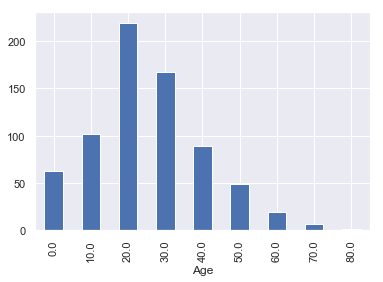

In [45]:
df.groupby(df.Age//10 * 10).size().plot(kind='bar',figsize = [6,4])
pass

<div class="alert alert-success">
    <b>EXERCISE</b>: Find data for male age distribution.
</div>

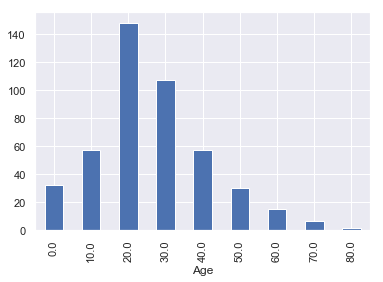

In [46]:
Male = df[df['Sex'] == 'male']
Male.groupby(Male.Age // 10 * 10).size().plot(kind='bar',figsize = [6,4])
pass

<div class="alert alert-success">
    <b>EXERCISE</b>: List data with Fare size greater then 50.
</div>

In [30]:
Fare50 = df[df.Fare>50]
Fare50.groupby([ 'Sex']).size()

Sex
female    87
male      73
dtype: int64

In [40]:
Fare50.groupby(['Age', 'Sex','Survived']).size().head(4)

Age    Sex     Survived
0.92   male    1           1
2.00   female  0           1
4.00   male    1           1
11.00  male    1           1
dtype: int64

#### 4. Groupby followed by transformation: ```groupby.transform()```. 
The transform operation accepts builting functions e.g., ```sum,  mean, std``` through keyword. One can define a new function called user defined function to supply inside ```transform(new_function)```.

In [32]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df.head(2)

,key,data
0,A,0
1,B,5


In [36]:
df.groupby('key').transform('mean').head(2)

,data
0,5
1,10


In [38]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [39]:
df.groupby('key').transform(normalize).head(2)

,data
0,-1.0
1,-1.0


### References:
1. [Pydata documentation: Group by: split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html)
2. [EuroScipy 2016 Pandas Tutorial by Joris Van den Bossche and Nicholas Devenish](https://github.com/jorisvandenbossche/pandas-tutorial)